In [1]:
import imutils
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize, rescale
from skimage import img_as_ubyte

# Image difference
[https://www.pyimagesearch.com/2017/06/19/image-difference-with-opencv-and-python/](https://www.pyimagesearch.com/2017/06/19/image-difference-with-opencv-and-python/)

In [2]:
tom1 = cv2.imread('similarity/tom1.jpg')
tom2 = cv2.imread('similarity/tom2.jpg')

def info(img):
    print(img.shape, img.dtype, img.min(), img.max())

info(tom1)
info(tom2)

tom1_resized = img_as_ubyte(resize(tom1, (140, 140), mode='constant'))
tom2_resized = img_as_ubyte(resize(tom2, (140, 140), mode='constant'))

print()
info(tom1_resized)
info(tom2_resized)

(398, 317, 3) uint8 0 255
(398, 317, 3) uint8 0 255

(140, 140, 3) uint8 0 255
(140, 140, 3) uint8 0 255


/Users/antonioferegrino/.local/share/virtualenvs/notebooks-MjLFzX2L/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/Users/antonioferegrino/.local/share/virtualenvs/notebooks-MjLFzX2L/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


<Figure size 432x288 with 0 Axes>

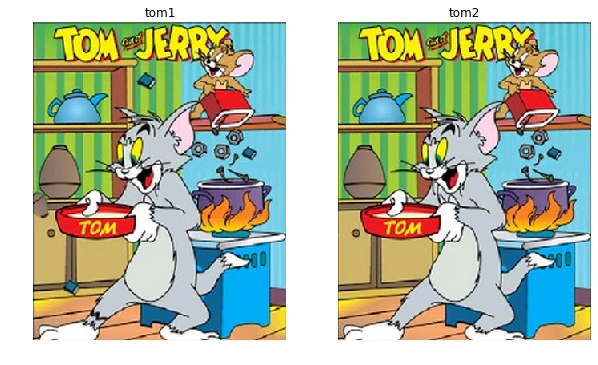

In [3]:
def display(images):
    size = len(images)
    plt.figure()
    
    f, axes = plt.subplots(1, size)
    f.set_figwidth(10)
    f.set_figheight(20)
    for i, s in enumerate(images.keys()):
        axes[i].imshow(cv2.cvtColor(images[s], cv2.COLOR_BGR2RGB), cmap='gray')
        axes[i].set_title(s)
        axes[i].axis('off')
   
    plt.show()
    
display({
    'tom1': tom1,
    'tom2': tom2
})

In [4]:
from skimage.measure import compare_ssim as ssim

print(ssim(tom1, tom1, multichannel=True))
print(ssim(tom2, tom2, multichannel=True))
print(ssim(tom1, tom2, multichannel=True))

1.0
1.0
0.9040608271283329


In [5]:
tom1_gray = cv2.cvtColor(tom1, cv2.COLOR_BGR2GRAY)
tom2_gray = cv2.cvtColor(tom2, cv2.COLOR_BGR2GRAY)

<Figure size 432x288 with 0 Axes>

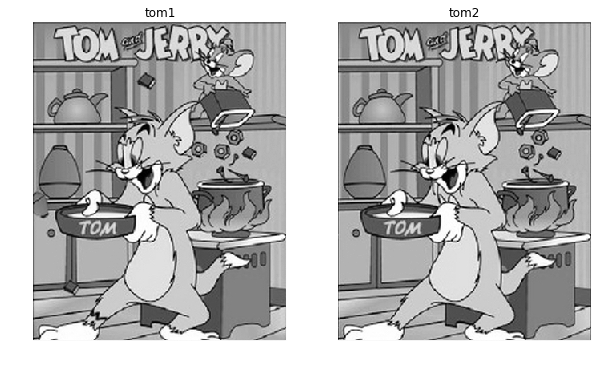

In [6]:
images = {
    'tom1': tom1_gray,
    'tom2': tom2_gray
}

plt.figure()
f, axes = plt.subplots(1, 2)
f.set_figwidth(10)
f.set_figheight(20)
for i, s in enumerate(images.keys()):
    axes[i].imshow(images[s], cmap='gray')
    axes[i].set_title(s)
    axes[i].axis('off')
plt.show()

In [7]:
score, diff = ssim(tom1_gray, tom2_gray, full=True)
diff =  np.clip(diff, -1, 1)
diff = img_as_ubyte(diff)
print(f"SSIM: {score:0.4}")

SSIM: 0.9277


(-0.5, 316.5, 397.5, -0.5)

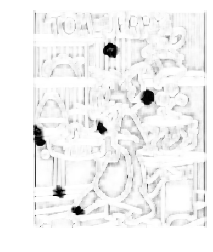

In [8]:
plt.imshow(diff, cmap='gray')
plt.axis('off')

In [9]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]

<Figure size 432x288 with 0 Axes>

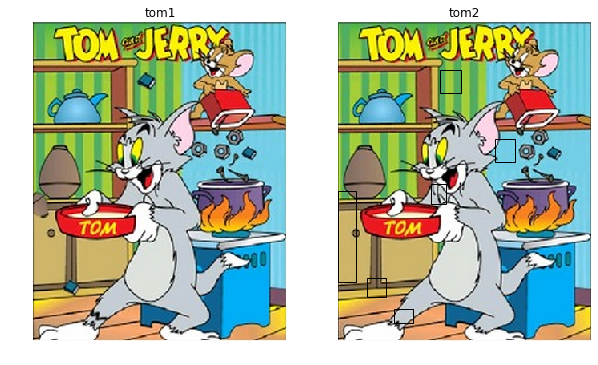

In [10]:
import matplotlib.patches as patches

images = {
    'tom1': tom1,
    'tom2': tom2
}

size = len(images)
plt.figure()
f, axes = plt.subplots(1, size)
f.set_figwidth(10)
f.set_figheight(20)
for i, s in enumerate(images.keys()):
    axes[i].imshow(cv2.cvtColor(images[s], cv2.COLOR_BGR2RGB), cmap='gray')
    axes[i].set_title(s)
    axes[i].axis('off')

for c in cnts:
    # compute the bounding box of the contour and then draw the
    # bounding box on both input images to represent where the two
    # images differ
    x, y, w, h = cv2.boundingRect(c)
    # Dismissed small differences
    if w < 10 or h < 10: continue
    axes[1].add_patch(
     patches.Rectangle(
        (x, y), w, h,
        fill=0      # remove background
     )) 
    
plt.show()

## On clean, nice images:  
Obtained [from here](https://www.visa.ca/en_CA/pay-with-visa/cards/credit-cards.html)

<Figure size 432x288 with 0 Axes>

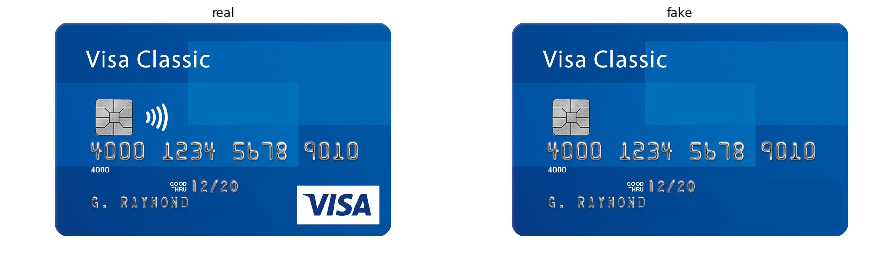

In [11]:
fake = cv2.imread('similarity/cc_fake.jpg')
real = cv2.imread('similarity/cc_real.jpg')
images = {
    'real': real,
    'fake': fake
}
plt.figure()
f, axes = plt.subplots(1, 2)
f.set_figwidth(15)
for i, s in enumerate(images.keys()):
    axes[i].imshow(cv2.cvtColor(images[s], cv2.COLOR_BGR2RGB), cmap='gray')
    axes[i].set_title(s)
    axes[i].axis('off')
plt.show()

In [12]:
fake_gray = cv2.cvtColor(fake, cv2.COLOR_BGR2GRAY)
real_gray = cv2.cvtColor(real, cv2.COLOR_BGR2GRAY)

<Figure size 432x288 with 0 Axes>

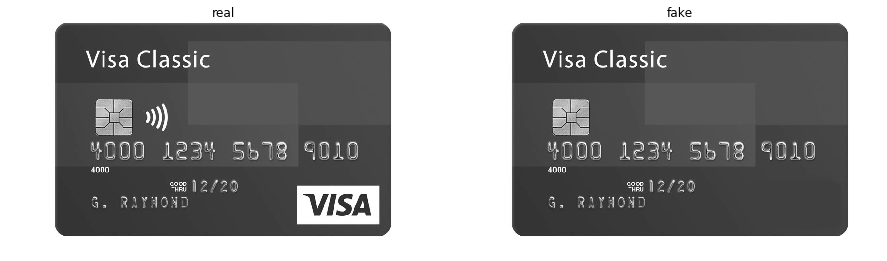

In [13]:
fake = cv2.imread('similarity/cc_fake.jpg')
real = cv2.imread('similarity/cc_real.jpg')
images = {
    'real': real_gray,
    'fake': fake_gray
}
plt.figure()
f, axes = plt.subplots(1, 2)
f.set_figwidth(15)
for i, s in enumerate(images.keys()):
    axes[i].imshow(images[s], cmap='gray')
    axes[i].set_title(s)
    axes[i].axis('off')
plt.show()

In [14]:
score, diff = ssim(real_gray, fake_gray, full=True)
diff =  np.clip(diff, -1, 1)
diff = img_as_ubyte(diff)
print(f"SSIM: {score:0.4}")

SSIM: 0.9579


(-0.5, 799.5, 449.5, -0.5)

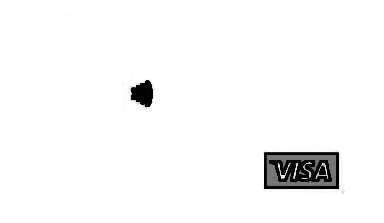

In [17]:
plt.imshow(diff, cmap='gray')
plt.axis('off')

In [18]:
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]

<Figure size 432x288 with 0 Axes>

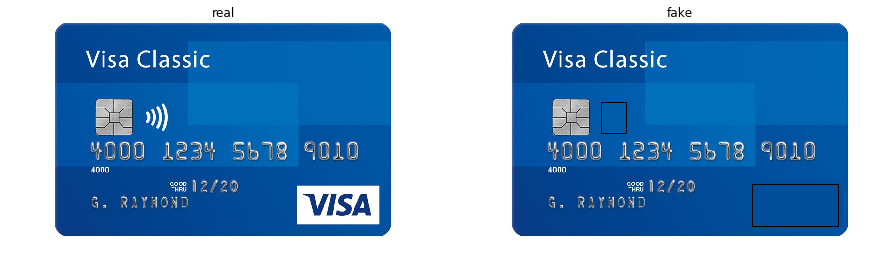

In [19]:
import matplotlib.patches as patches

images = {
    'real': real,
    'fake': fake
}

size = len(images)
plt.figure()
f, axes = plt.subplots(1, size)
f.set_figwidth(15)
for i, s in enumerate(images.keys()):
    axes[i].imshow(cv2.cvtColor(images[s], cv2.COLOR_BGR2RGB), cmap='gray')
    axes[i].set_title(s)
    axes[i].axis('off')

for c in cnts:
    # compute the bounding box of the contour and then draw the
    # bounding box on both input images to represent where the two
    # images differ
    x, y, w, h = cv2.boundingRect(c)
    # Dismissed small differences
    if w < 10 or h < 10: continue
    axes[1].add_patch(
     patches.Rectangle(
        (x, y), w, h,
        fill=0      # remove background
     )) 
    
plt.show()